# CMSE 201 Rough Draft

#### CMSE 201 Final Project
### &#9989; Kaitlyn Watson
### &#9989; Section_004
#### &#9989; 4/10/2022

# ___Analysis of Factors that Affected Avocado Prices from 2015-2018___

## Background and Motivation

As the world is ever-changing, it is clear that the American diet is as well. More and more people are transitioning to a healthier lifestyle and including more whole foods into their diet; one of these being avocados. Avocados are nutrient dense, high in healthy fats, and keep you satified. Because of these benefits, people have been more inclined to add avocado to their salads, smoothies, bowls, and the most popular trend of avocado toast. With so many ways of incorportating this fruit into everyday meals/snacks, more people, restaurants, and companies have been purchasing this produce. Due to the rise in popularity, I have chosen to analyze avocados and their average prices overtime. My research question I intend to answer is:

__How has the type of avocado, the region in which it is located, and the various PLU numbers impact the average price at which it is sold?__ 

## Methodology

I will providing several visulizations with breakdowns of each region:

In [8]:
#importing modules 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [393]:

#import the dataset
Avocados=pd.read_csv("avocado.csv")


#Clean up dataset to only include information needed
Avocados1 = Avocados.loc[:, ~Avocados.columns.str.contains('^Unnamed')]    #remove any unneccary rows
Avocados2=Avocados1.drop(columns="Date")
Avocados_with_index = Avocados2.set_index("region")   #set index as region
Avocados_by_region=Avocados_with_index.drop(['Albany','Atlanta','California','BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston','Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Nashville', 'NewOrleansMobile', 'NorthernNewEngland',
       'NewYork','Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh','Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 
       'SouthCentral','SouthCarolina','Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS','WestTexNewMexico'] )     #removed all regions not included in analysis
Avocados_Region=Avocados_by_region.reset_index()    #reset the index
Avocados_Region.head()

,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,GreatLakes,1.01,2580602.96,336673.70,1411808.83,254629.93,577490.50,400003.80,98401.09,79085.61,conventional,2015
1,GreatLakes,1.01,2504745.45,383701.76,1337404.03,241580.61,542059.05,358218.65,122999.48,60840.92,conventional,2015
2,GreatLakes,1.03,2608448.06,463349.67,1342449.84,228576.54,574072.01,409909.70,148004.93,16157.38,conventional,2015
3,GreatLakes,1.00,2981347.20,401676.14,1680591.43,398320.64,500758.99,325850.00,124306.44,50602.55,conventional,2015
4,GreatLakes,1.07,2198408.92,318661.40,1199426.12,248818.72,431502.68,328369.47,83149.01,19984.20,conventional,2015


#### The first visualizations provide a distribution of prices for each region separated by year:

Text(0.5, 1.05, 'Distribution of Avocado Prices Among Regions from 2015-2018')

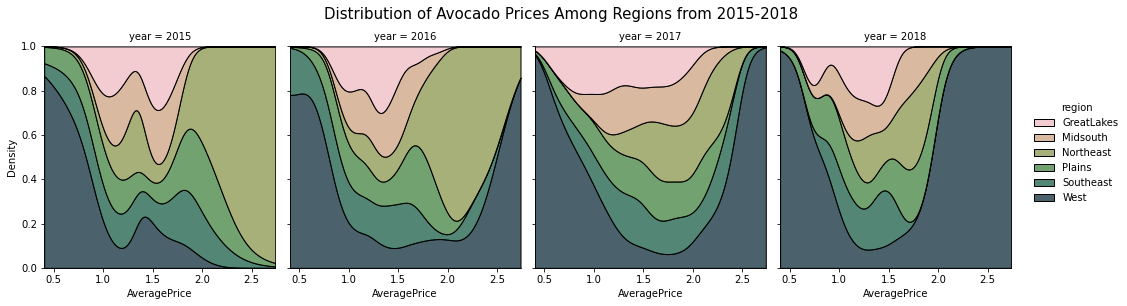

In [234]:
#create a density plot 
h=sns.displot(  
    data=Avocados_Region,
    x="AveragePrice", hue="region",
    kind="kde", height=4,aspect=0.9,col='year',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-0.9,hue=1,light=.8",)
h.fig.suptitle('Distribution of Avocado Prices Among Regions from 2015-2018', fontsize = 15, y=1.05)


#### The data is then broken down by the type of avocado

<Figure size 360x360 with 0 Axes>

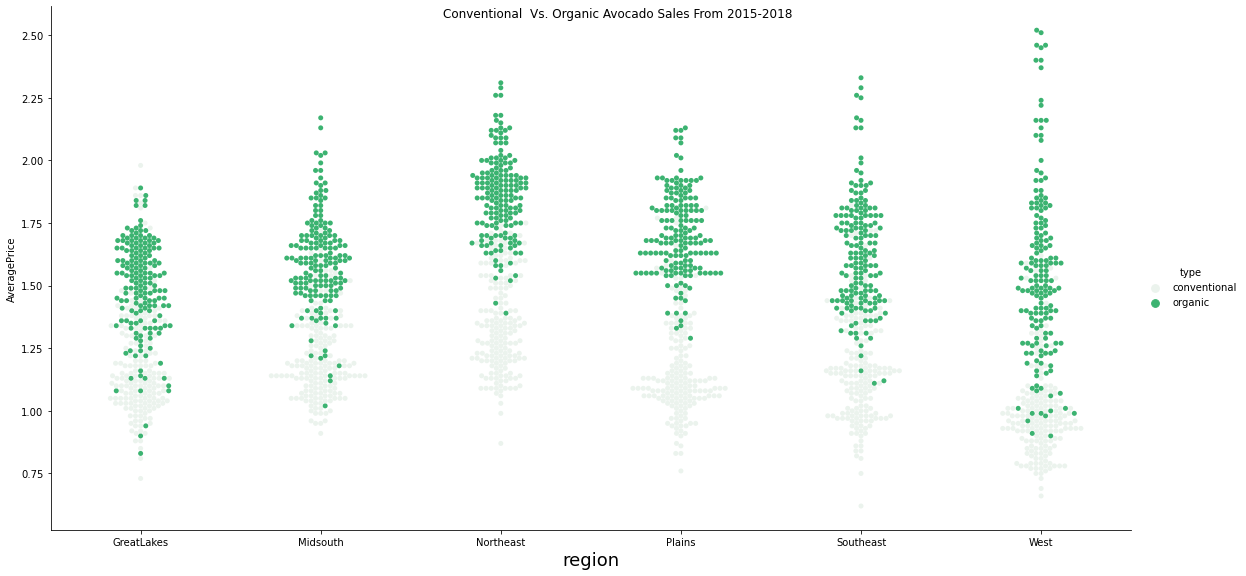

In [492]:
#plot the Average Price for each region selected from 2015 to 2018 and specify the type of avocado
plt.figure(figsize=(5,5))

 
g = sns.catplot(x="region", y="AveragePrice",
                hue="type", 
                data=Avocados_Region, kind="swarm",color='mediumseagreen',
                height=8, aspect=2,);
g.fig.suptitle('Conventional  Vs. Organic Avocado Sales From 2015-2018')
g.set_xlabels(visible=True, fontsize=18)
g.set_ylabels('AveragePrice')
plt.show()


<Figure size 360x360 with 0 Axes>

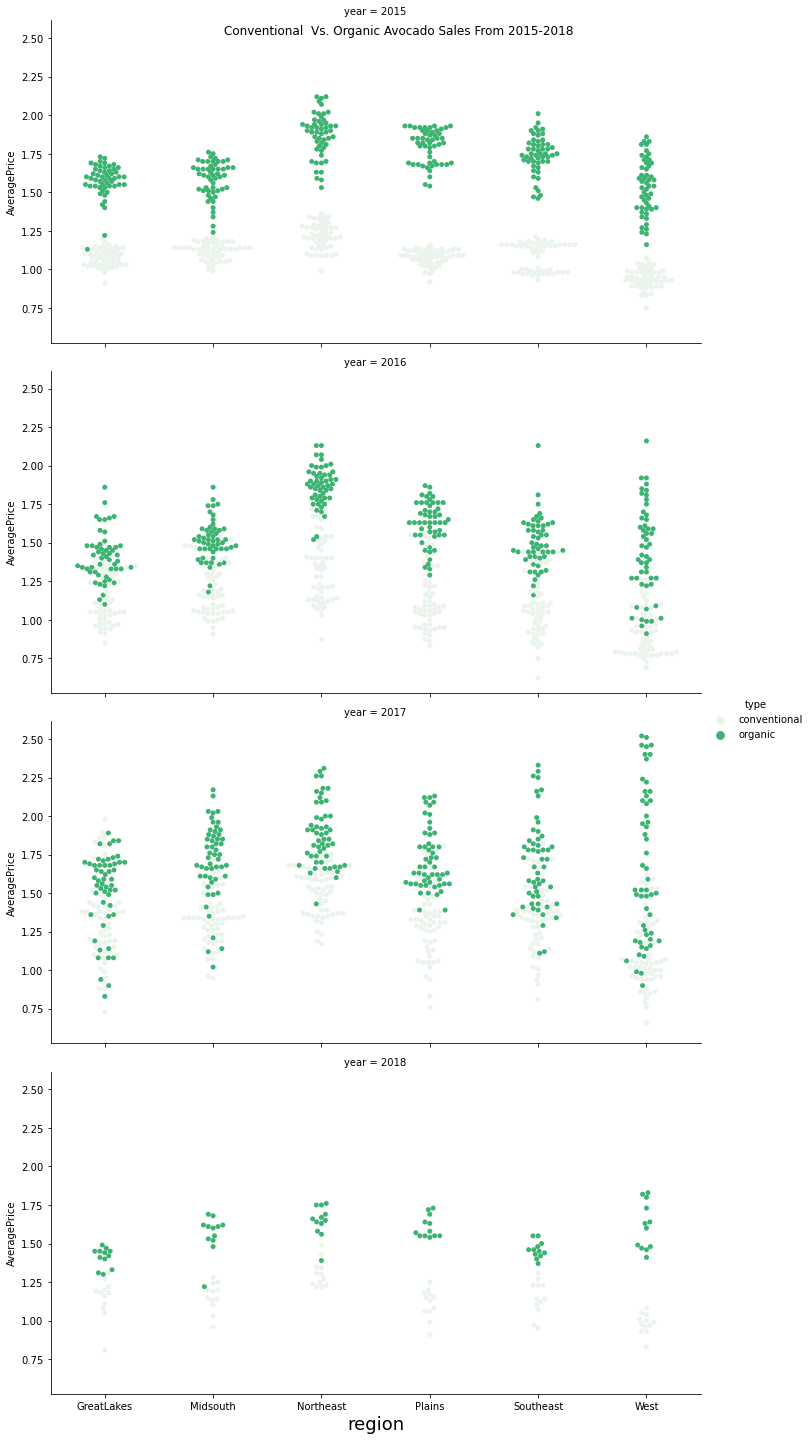

In [490]:
#breaking down plot above by year

plt.figure(figsize=(5,5))

g = sns.catplot(x="region", y="AveragePrice",
                hue="type", row='year',
                data=Avocados_Region, color='mediumseagreen',kind="swarm",
                height=5, aspect=2,);
g.fig.suptitle('Conventional  Vs. Organic Avocado Sales From 2015-2018')
g.set_xlabels(visible=True, fontsize=18)
g.set_ylabels('AveragePrice')
plt.show()



Text(0.5, 1.0, 'Percentage of Avocados by PLU number')

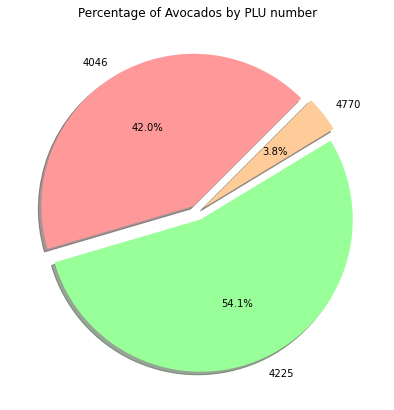

In [475]:
plu=[]

plu.append(np.mean(Avocados_Region['4046']))
plu.append(np.mean(Avocados_Region['4225']))
plu.append(np.mean(Avocados_Region['4770']))

labels=['4046', '4225', '4770']
explode = (0.05, 0.05,0.05)

colors = ['#ff9999','#99ff99','#ffcc99']
fig = plt.figure(figsize =(10, 7))
plt.pie(plu, labels=labels,explode=explode, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=45)


plt.title('Percentage of Avocados by PLU number')


## Results

 Looking back at the visualizations, there are several trends that need to be accounted for. First, the density plot provided gives some general insight in regard to the various regions and the prices overtime. The West region particularly stands out in this density plot. It has the widest and most varying distribution in prices, which we should take special note of for the year 2018. On the otherhand, the Great Lakes appears to have one of the smallest distributions between prices for all four years documented. 

 As we continue further through the methodolgy, the swarm plot provides greater detail into how the type of avocado plays a role in the price variability. For every single region spanning all four years, the organic avocados have a clearly higher price then the conventional avocados. This results makes sense due to the fact that relatively speaking, produce that is marked as organic costs more to produce and therefore is sold ar a higher price as well. After viewing this more general plot, the swarmplot is broken down even further into each individual year. Overtime, the prices for almost all regions slightly increase each year for both organic and conventional. This trend continues up until we reach the year 2018. Here we see a dramatic decrease in avocado sales along with a dramatic drop in prices. This direct affect seems abstract as intuitively, we would infer that a decrease in avocado orices, would lead to a higher production and consumption rate. The question comes down to: What Happened in 2018 to cause this to occur?

### What Happened In 2018?


## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

1. Michael Waskom https://seaborn.pydata.org/examples/index.html Acessed 04/10/2022
2. https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
3. https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f